In [1]:
# import necessary tools
import pandas as pd
import json
import os
import glob
import re

In [2]:
# create file paths + dataframe
path = 'C:/Users/hp/Desktop/drake-analysis-master/lyrics_files'
lyrics_df = pd.DataFrame(columns=['name', 'album', 'year', 'lyrics'])

In [3]:
# add data to dataframe
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.      
    with open(filename, encoding='utf-8', mode='r') as json_file:
        data = json.load(json_file)
        data.keys()
        songs = data.get('songs')
        for x in songs:
            lyrics_df = lyrics_df.append({
                'name': x.get('title'),
                'album': x.get('album'),
                'year': x.get('year'),
                'lyrics': x.get('lyrics')
            }, ignore_index=True)

In [4]:
lyrics_df.head()

,name,album,year,lyrics
0,0 to 100 / The Catch Up,NBA 2K16 Soundtrack,2014-06-01,"[Produced by Boi-1da, Frank Dukes, Noah ""40"" S..."
1,10 Bands,If You’re Reading This It’s Too Late,2015-02-13,"[Chorus]\n10 Bands, 50 bands, 100 bands, fuck ..."
2,2AM,None,None,"Stop pretending, I know when you're lying\nI k..."
3,305 to My City,Nothing Was the Same,2013-09-24,"[Intro]\nDrop down, drop-drop (Shit is real ou..."
4,4422,More Life,2017-03-18,"[Refrain]\nI'm runnin', but can't run away\nYo..."


In [5]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
name      392 non-null object
album     241 non-null object
year      280 non-null object
lyrics    392 non-null object
dtypes: object(4)
memory usage: 12.4+ KB


In [6]:
lyrics_df = lyrics_df.dropna(how='any', axis=0)

In [7]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 390
Data columns (total 4 columns):
name      221 non-null object
album     221 non-null object
year      221 non-null object
lyrics    221 non-null object
dtypes: object(4)
memory usage: 8.6+ KB


In [8]:
lyrics_df.head(10)

,name,album,year,lyrics
0,0 to 100 / The Catch Up,NBA 2K16 Soundtrack,2014-06-01,"[Produced by Boi-1da, Frank Dukes, Noah ""40"" S..."
1,10 Bands,If You’re Reading This It’s Too Late,2015-02-13,"[Chorus]\n10 Bands, 50 bands, 100 bands, fuck ..."
3,305 to My City,Nothing Was the Same,2013-09-24,"[Intro]\nDrop down, drop-drop (Shit is real ou..."
4,4422,More Life,2017-03-18,"[Refrain]\nI'm runnin', but can't run away\nYo..."
7,6 God,If You’re Reading This It’s Too Late,2014-10-25,[Produced by Boi-1da and SykSense]\n\n[Intro]\...
8,6 Man,If You’re Reading This It’s Too Late,2015-02-13,[Verse 1]\nBoomin out in South Gwinnett like L...
9,6PM in New York,If You’re Reading This It’s Too Late,2015-02-13,"[Intro]\nYeah\nYeah\n\n[Verse]\nOh, you gotta ..."
11,8 Out of 10,Scorpion,2018-06-29,[Intro: Drake]\nToo rich for who? Y'all just g...
12,9,Views,2016-04-29,"[Intro]\nYeah, for the dogs dem, you know\nMan..."
13,9AM in Dallas,Thank Me Later,2010-06-15,[Verse]\nThese are my One St. Thomas flows\nMe...


In [9]:
lyrics_df['year'] = pd.to_datetime(lyrics_df['year']).dt.strftime('%Y')
lyrics_df.head(10)

,name,album,year,lyrics
0,0 to 100 / The Catch Up,NBA 2K16 Soundtrack,2014,"[Produced by Boi-1da, Frank Dukes, Noah ""40"" S..."
1,10 Bands,If You’re Reading This It’s Too Late,2015,"[Chorus]\n10 Bands, 50 bands, 100 bands, fuck ..."
3,305 to My City,Nothing Was the Same,2013,"[Intro]\nDrop down, drop-drop (Shit is real ou..."
4,4422,More Life,2017,"[Refrain]\nI'm runnin', but can't run away\nYo..."
7,6 God,If You’re Reading This It’s Too Late,2014,[Produced by Boi-1da and SykSense]\n\n[Intro]\...
8,6 Man,If You’re Reading This It’s Too Late,2015,[Verse 1]\nBoomin out in South Gwinnett like L...
9,6PM in New York,If You’re Reading This It’s Too Late,2015,"[Intro]\nYeah\nYeah\n\n[Verse]\nOh, you gotta ..."
11,8 Out of 10,Scorpion,2018,[Intro: Drake]\nToo rich for who? Y'all just g...
12,9,Views,2016,"[Intro]\nYeah, for the dogs dem, you know\nMan..."
13,9AM in Dallas,Thank Me Later,2010,[Verse]\nThese are my One St. Thomas flows\nMe...


In [10]:
lyrics_df = lyrics_df.sort_values('album')
lyrics_df.head(10)

,name,album,year,lyrics
107,Fallen,Born Successful,2009,"[Intro: Drake]\nYeah, it's Drake, KC\n\n[Verse..."
81,Do It Now,Born Successful,2009,"[Intro]\nUh, yeah, alright\nUh, well alright\n..."
178,Juice,Born Successful,2009,[Produced by Boi-1da]\n\n[Intro]\nBoi-1da... D...
340,The Winner,Born Successful,2009,[Verse 1]\nI’m performing tonight you know tha...
337,The Search,Born Successful,2009,(Saukrates intro)\nThey say we killin' 'em all...
269,Right to Left,Born Successful,2009,[Intro]\n[?]\n\n[Chorus: Drake]\nBlue green je...
158,I Do This,Born Successful,2009,"[Verse 1: Drake]\nUh, shit's all good\nThe dea..."
120,Forever (Born Successful),Born Successful,2009,[Chorus: Drake]\nIt may not mean nothing to y'...
131,Give Ya,Comeback Season,2007,"[Verse 1: Drake]\nCheck, look\nAnd I ain't try..."
280,Share,Comeback Season,2007,"[Hook (x3)]\nTake what you want, take what you..."


In [11]:
lyrics_df = lyrics_df.reset_index(drop=True)
lyrics_df.head(10)

,name,album,year,lyrics
0,Fallen,Born Successful,2009,"[Intro: Drake]\nYeah, it's Drake, KC\n\n[Verse..."
1,Do It Now,Born Successful,2009,"[Intro]\nUh, yeah, alright\nUh, well alright\n..."
2,Juice,Born Successful,2009,[Produced by Boi-1da]\n\n[Intro]\nBoi-1da... D...
3,The Winner,Born Successful,2009,[Verse 1]\nI’m performing tonight you know tha...
4,The Search,Born Successful,2009,(Saukrates intro)\nThey say we killin' 'em all...
5,Right to Left,Born Successful,2009,[Intro]\n[?]\n\n[Chorus: Drake]\nBlue green je...
6,I Do This,Born Successful,2009,"[Verse 1: Drake]\nUh, shit's all good\nThe dea..."
7,Forever (Born Successful),Born Successful,2009,[Chorus: Drake]\nIt may not mean nothing to y'...
8,Give Ya,Comeback Season,2007,"[Verse 1: Drake]\nCheck, look\nAnd I ain't try..."
9,Share,Comeback Season,2007,"[Hook (x3)]\nTake what you want, take what you..."


In [12]:
def clean_lyrics(lyrics):
    if lyrics is None:
        return lyrics
    
    # combine lists of tokens into single string
    #lyrics = ' '.join(lyrics)
            
    # remove apostrophes
    lyrics = lyrics.replace('\'', '')
            
    # remove song structure tags or instructions in brackets
    lyrics = re.sub(r'[\*\[|\(|\{].*\n*.*[\]\)\}\*]' , ' ', lyrics)
   
    # remove variations of Verse 1, VERSE 2, etc...
    for verse in ['verse', 'VERSE', 'Verse']:
        lyrics = re.sub(verse+' \d*', '', lyrics)
    
    # some structure markers formatted as allcaps without brackets
    for word in ['OUTRO', 'INSTRUMENTAL', 'PRE', 'HOOK',
                 'PRODUCED', 'REFRAIN', 'POST', 'REPEAT', '2x', '3x', '4x',
                 'CHORUS', 'INTRO', 'INTERLUDE']:
        lyrics = lyrics.replace(word, '')
        
    # remove varations of Chorus
    lyrics = re.sub(r'\n*Chorus:*.*' , ' ', lyrics)
    lyrics = re.sub(r'^Chorus:*.*' , ' ', lyrics)
    lyrics = re.sub(r'\nRepeat [C|c]horus:*.*' , ' ', lyrics)
    
    # remove variations of Intro
    lyrics = re.sub(r'Intro[\s|\n|:].*', ' ', lyrics)
    
    # remove variations of Instrumental
    lyrics = re.sub(r'-+.*[i|I]nstrumental.*-+', ' ', lyrics)
    lyrics = re.sub(r'\nBrief instrumental.*\n', ' ', lyrics)
    lyrics = re.sub(r'\nInstrumental', ' ', lyrics)
    lyrics = re.sub(r'\nInstrumental break', ' ', lyrics)
    lyrics = re.sub(r'\nInstrumental--', ' ', lyrics)
    lyrics = re.sub(r'\n~Instrumental~', ' ', lyrics)
    
    # remove variations of Bridge
    lyrics = re.sub(r'\n\[*Bridge:\[*', ' ', lyrics)
    
    # remove variations of Hook
    lyrics = re.sub(r'Hook:.*', ' ', lyrics)
    
    # remove varations of Repeat
    lyrics = re.sub(r'Repeat\s.*', ' ', lyrics)
    lyrics = re.sub(r'\nRepeat$', ' ', lyrics)
    
    # remove credits
    lyrics = re.sub(r'.*[P|p]roduced [B|b]y.*', ' ', lyrics)
    lyrics = re.sub(r'.*[W|w]ritten [B|b]y.*', ' ', lyrics)
    
    # remove strays and typos
    lyrics = re.sub(r'\[Outro\[', ' ', lyrics)
    lyrics = re.sub(r'Sax & background & instrumental\)', ' ', lyrics)
    lyrics = re.sub(r'\nSource: ', ' ', lyrics)
    lyrics = re.sub(r'Shotgun 2: 58 Trk 1 \n  \nJr. Walker & The All Stars '\
                    +'\nAnd/or The Funk Brothers - instrumental \nPop Chart '\
                    +'#4 Feb 13, 1965 \nSoul Label - 35008   \n ', ' ', lyrics)
    lyrics = re.sub(r'- musical interlude -', ' ', lyrics)
    lyrics = re.sub(r'\nRefrain:', ' ', lyrics)
            
    # replace all punctuations with spaces
    lyrics = re.sub(r'[^\w\s]', ' ', lyrics)
            
    # replace consecutive whitespaces with single space
    lyrics = re.sub(r'\s+', ' ', lyrics)
    
    # convert all tokens to lowercase
    lyrics = lyrics.lower()

    return lyrics

In [13]:
lyrics_df['lyrics'] = lyrics_df['lyrics'].map(clean_lyrics)

In [14]:
lyrics_df

,name,album,year,lyrics
0,Fallen,Born Successful,2009,yeah its drake kc we was just walking just sm...
1,Do It Now,Born Successful,2009,uh yeah alright uh well alright yeah well alr...
2,Juice,Born Successful,2009,boi 1da drizzy yall dont really like me i can...
3,The Winner,Born Successful,2009,i m performing tonight you know that shit gon...
4,The Search,Born Successful,2009,they say we killin em all all all all hip hop...
...,...,...,...,...
216,One Dance,Views,2016,baby i like your style grips on your waist fr...
217,Trophies,Young Money: Rise Of An Empire,2014,had hit records on my demo did yall boys not ...
218,I’m Ready For You,Young Sweet Jones 2,2010,r i p to the girl you used to see her days ar...
219,Loving You No More,Young Sweet Jones 2,2010,aint nothin worse than the hurt we receive fr...


In [21]:
# add data to csv file
lyrics_path = "C:/Users/hp/Desktop/drake-analysis-master/lyrics.csv"
lyrics_df.to_csv(lyrics_path, index=False)

In [19]:
# import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
# set a figure size/color scheme for all the plots we shall be drawing in this notebook
sns.set(rc={'figure.figsize': (12, 10)}, style='darkgrid', palette='Reds')

In [23]:
# load the data
data = pd.read_csv('lyrics.csv')
data.head(10)

,name,album,year,lyrics
0,Fallen,Born Successful,2009,yeah its drake kc we was just walking just sm...
1,Do It Now,Born Successful,2009,uh yeah alright uh well alright yeah well alr...
2,Juice,Born Successful,2009,boi 1da drizzy yall dont really like me i can...
3,The Winner,Born Successful,2009,i m performing tonight you know that shit gon...
4,The Search,Born Successful,2009,they say we killin em all all all all hip hop...
5,Right to Left,Born Successful,2009,blue green jewels with the supreme fuel and l...
6,I Do This,Born Successful,2009,uh shits all good the deal got signed and my ...
7,Forever (Born Successful),Born Successful,2009,it may not mean nothing to yall but understan...
8,Give Ya,Comeback Season,2007,check look and i aint tryna get to know nobod...
9,Share,Comeback Season,2007,take what you want take what you want take wh...


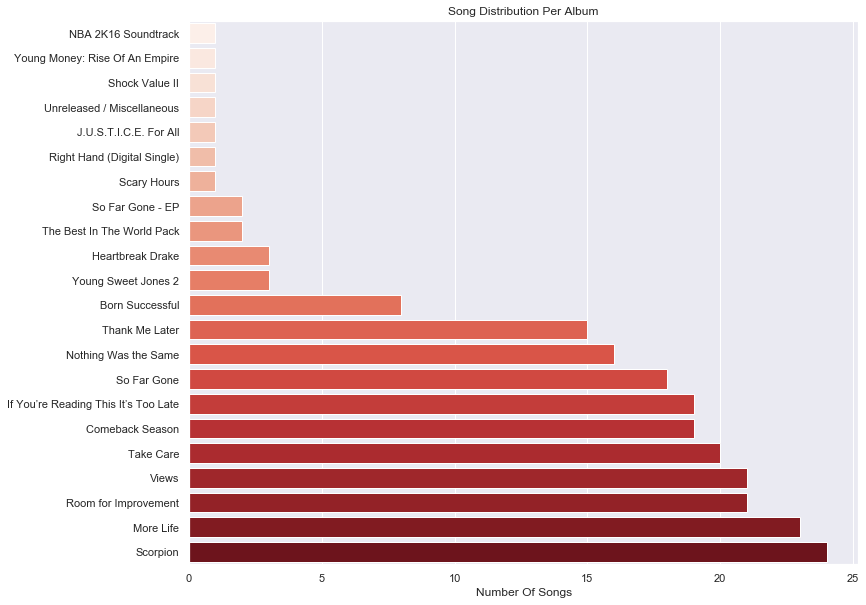

In [24]:
sns.countplot(y=data['album'].values, order=data['album'].value_counts(ascending=True).index, palette='Reds')
plt.title('Song Distribution Per Album')
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()

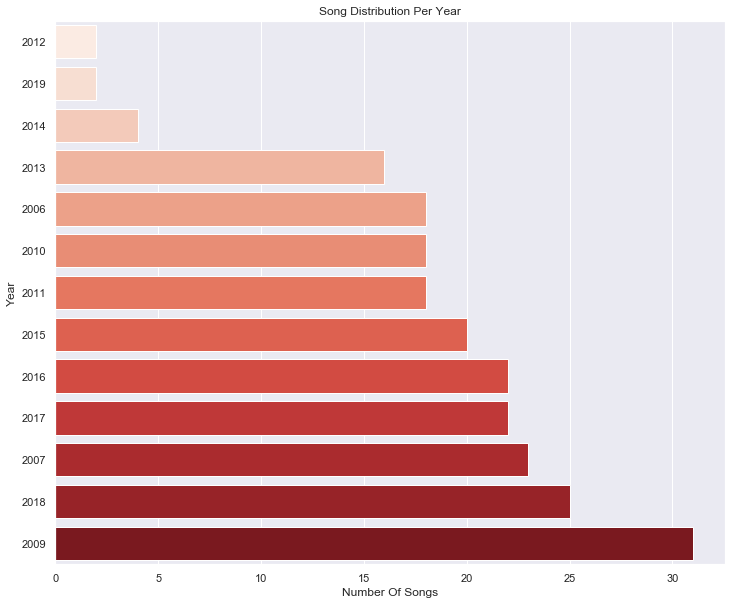

In [25]:
sns.countplot(y=data['year'].values, order=data['year'].value_counts(ascending=True).index, palette='Reds')
plt.title('Song Distribution Per Year')
plt.ylabel('Year', fontsize=12)
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()

In [26]:
# create a stopwords list
stopwords = nltk.corpus.stopwords.words('english') #are lowercase
nltkStopwordsWithAdditions = stopwords + \
                             ['la', #comes up a lot (like 'la-la-la') but isn't a word so don't include it
                              'eh', 'ayy', #same as 'la'. 'eh' as in pronounced like 'aye'
                              'oh', 'ooh', #an exclamation with no real meaning but ranks highly so exclude
                              'us', 'u', 'ya', #different forms of 'you' which is a stopword
                              'na', 'ta', #alt forms of 'to' which is a stopword. From 'gonna', 'wanna', 'gotta'
                              'nah', #usage a mix of a sung-only word and slang for 'no' which is a stopword
                              'po', 'woo', 'doo', 'ah', 'uh', 'uhh' #sung-only words
                             ]

In [27]:
drake = np.array(Image.open("C:/Users/hp/Desktop/drake.png"))
transformed_drake_mask = drake

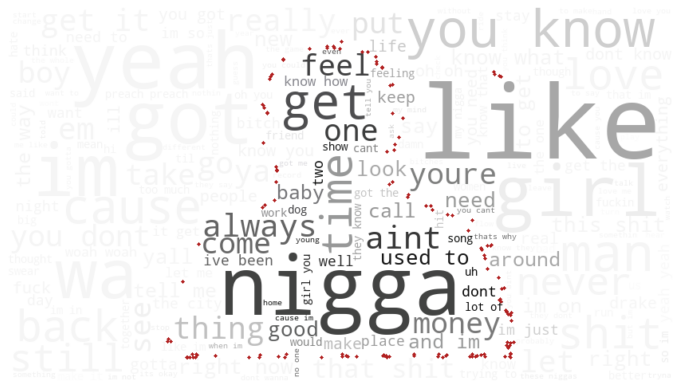

In [28]:
wordcloud_general = WordCloud(stopwords=stopwords, background_color='white',
                              contour_width=5, contour_color='firebrick',
                              mask=transformed_drake_mask).generate(' '.join(data['lyrics']))
image_colors = ImageColorGenerator(transformed_drake_mask)
plt.imshow(wordcloud_general.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', format='png')
plt.show()

In [29]:
# create a list for number of words per song
number_of_words_per_song_list=[]

# add elements to the list using a for loop
for i in range(213):
    number_of_words_per_song_list.append(len(data['lyrics'][i].split(' ')))

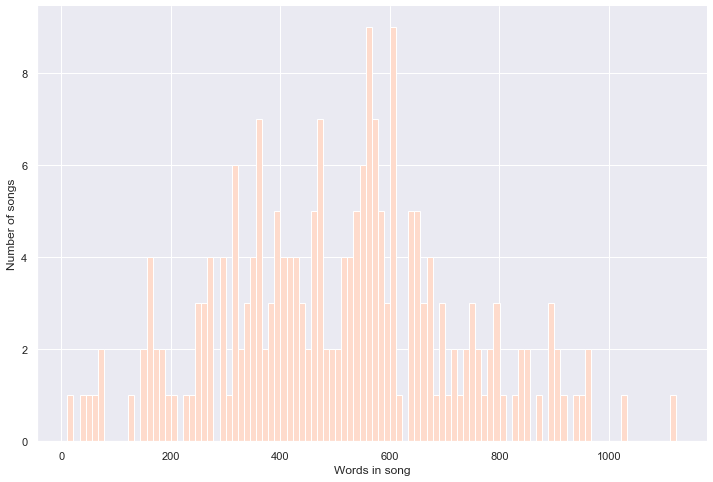

In [32]:
# plot the graph
fig, axs = plt.subplots(figsize=(12, 8))
axs.hist(number_of_words_per_song_list, 100)
axs.set_xlabel("Words in song")
axs.set_ylabel("Number of songs")
# hide the right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.show()

In [33]:
tokenizer = RegexpTokenizer(r'\w+')

data['tokens'] = data['lyrics'].apply(tokenizer.tokenize)
data.head(10)

,name,album,year,lyrics,tokens
0,Fallen,Born Successful,2009,yeah its drake kc we was just walking just sm...,"[yeah, its, drake, kc, we, was, just, walking,..."
1,Do It Now,Born Successful,2009,uh yeah alright uh well alright yeah well alr...,"[uh, yeah, alright, uh, well, alright, yeah, w..."
2,Juice,Born Successful,2009,boi 1da drizzy yall dont really like me i can...,"[boi, 1da, drizzy, yall, dont, really, like, m..."
3,The Winner,Born Successful,2009,i m performing tonight you know that shit gon...,"[i, m, performing, tonight, you, know, that, s..."
4,The Search,Born Successful,2009,they say we killin em all all all all hip hop...,"[they, say, we, killin, em, all, all, all, all..."
5,Right to Left,Born Successful,2009,blue green jewels with the supreme fuel and l...,"[blue, green, jewels, with, the, supreme, fuel..."
6,I Do This,Born Successful,2009,uh shits all good the deal got signed and my ...,"[uh, shits, all, good, the, deal, got, signed,..."
7,Forever (Born Successful),Born Successful,2009,it may not mean nothing to yall but understan...,"[it, may, not, mean, nothing, to, yall, but, u..."
8,Give Ya,Comeback Season,2007,check look and i aint tryna get to know nobod...,"[check, look, and, i, aint, tryna, get, to, kn..."
9,Share,Comeback Season,2007,take what you want take what you want take wh...,"[take, what, you, want, take, what, you, want,..."


In [39]:
all_words = [word for tokens in data['tokens'] for word in tokens]
VOCAB = sorted(list(set(all_words)))
len(VOCAB)
song_lengths = [len(tokens) for tokens in data['tokens']]
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max song length is %s" % max(song_lengths))

111457 words total, with a vocabulary size of 7542
Max song length is 1122


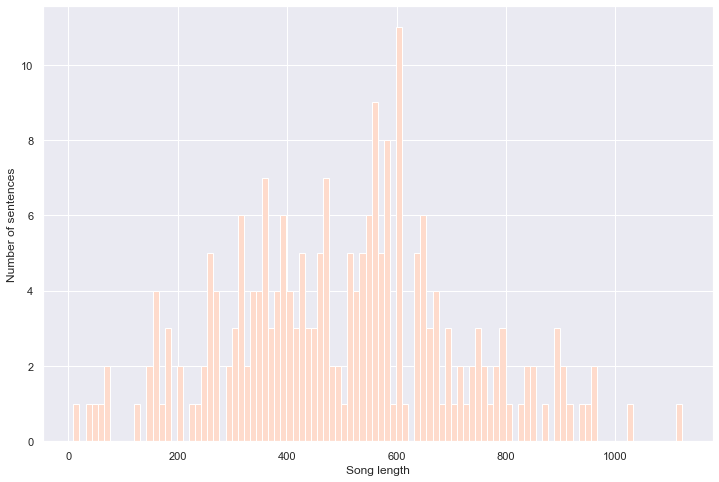

In [40]:
fig = plt.figure(figsize=(12, 8)) 
plt.xlabel('Song length')
plt.ylabel('Number of sentences')
plt.hist(song_lengths, 100)
plt.show()

In [41]:
word_counts = []
unique_word_counts = []
for i in range (0, len(data)):
    word_counts.append(len(data.iloc[i]['lyrics'].split()))
    unique_word_counts.append(len(set(data.iloc[i]['lyrics'].split())))
data['Word Counts'] = word_counts
data['Unique Word Counts'] = unique_word_counts

In [45]:
data=data.sort_values('year')
data.head(10)

,name,album,year,lyrics,tokens,Word Counts,Unique Word Counts
110,U.P.A. (Outro),Room for Improvement,2006,welcome ladies and gentlemen to our annual re...,"[welcome, ladies, and, gentlemen, to, our, ann...",157,111
91,Make Things Right,Room for Improvement,2006,look if you a girl with the aspirations of be...,"[look, if, you, a, girl, with, the, aspiration...",456,223
92,Do What You Do,Room for Improvement,2006,stance on lean leg up on the wall my niggas c...,"[stance, on, lean, leg, up, on, the, wall, my,...",829,262
99,Drake’s Voice Mail Box #3,Room for Improvement,2006,bro and let s put this whole mathematics toge...,"[bro, and, let, s, put, this, whole, mathemati...",159,94
94,Drake’s Voice Mail Box #2,Room for Improvement,2006,what up this kim damn i ve been trying to get...,"[what, up, this, kim, damn, i, ve, been, tryin...",43,28
95,Bad Meaning Good,Room for Improvement,2006,lady you say i stay in the house til four we ...,"[lady, you, say, i, stay, in, the, house, til,...",412,202
96,AM 2 PM,Room for Improvement,2006,yo i wake up every morning shower gather my b...,"[yo, i, wake, up, every, morning, shower, gath...",689,333
97,All This Love,Room for Improvement,2006,southern smoke this another one from your boy ...,"[southern, smoke, this, another, one, from, yo...",458,172
98,Special,Room for Improvement,2006,uh yeah man vo back again like we never left ...,"[uh, yeah, man, vo, back, again, like, we, nev...",901,299
93,Drake’s Voice Mail Box #1,Room for Improvement,2006,the man drake puts it the fuck down he s doin...,"[the, man, drake, puts, it, the, fuck, down, h...",162,85


In [62]:
summary_dataset = pd.DataFrame()
years = data['year'].unique().tolist()
for i in range(0, len(years)):
    row = {
        "year": years[i],
        "Average Words": data['Word Counts'][data['year'] == years[i]].mean(),
        "Unique Words": data['Unique Word Counts'][data['year'] == years[i]].mean()
    }
    summary_dataset = summary_dataset.append(row, ignore_index=True)
summary_dataset['year'] = summary_dataset['year'].astype(int)

In [63]:
summary_dataset.head()

,Average Words,Unique Words,year
0,481.166667,215.500000,2006
1,509.478261,227.869565,2007
2,524.064516,223.903226,2009
3,574.333333,221.555556,2010
4,575.333333,215.722222,2011


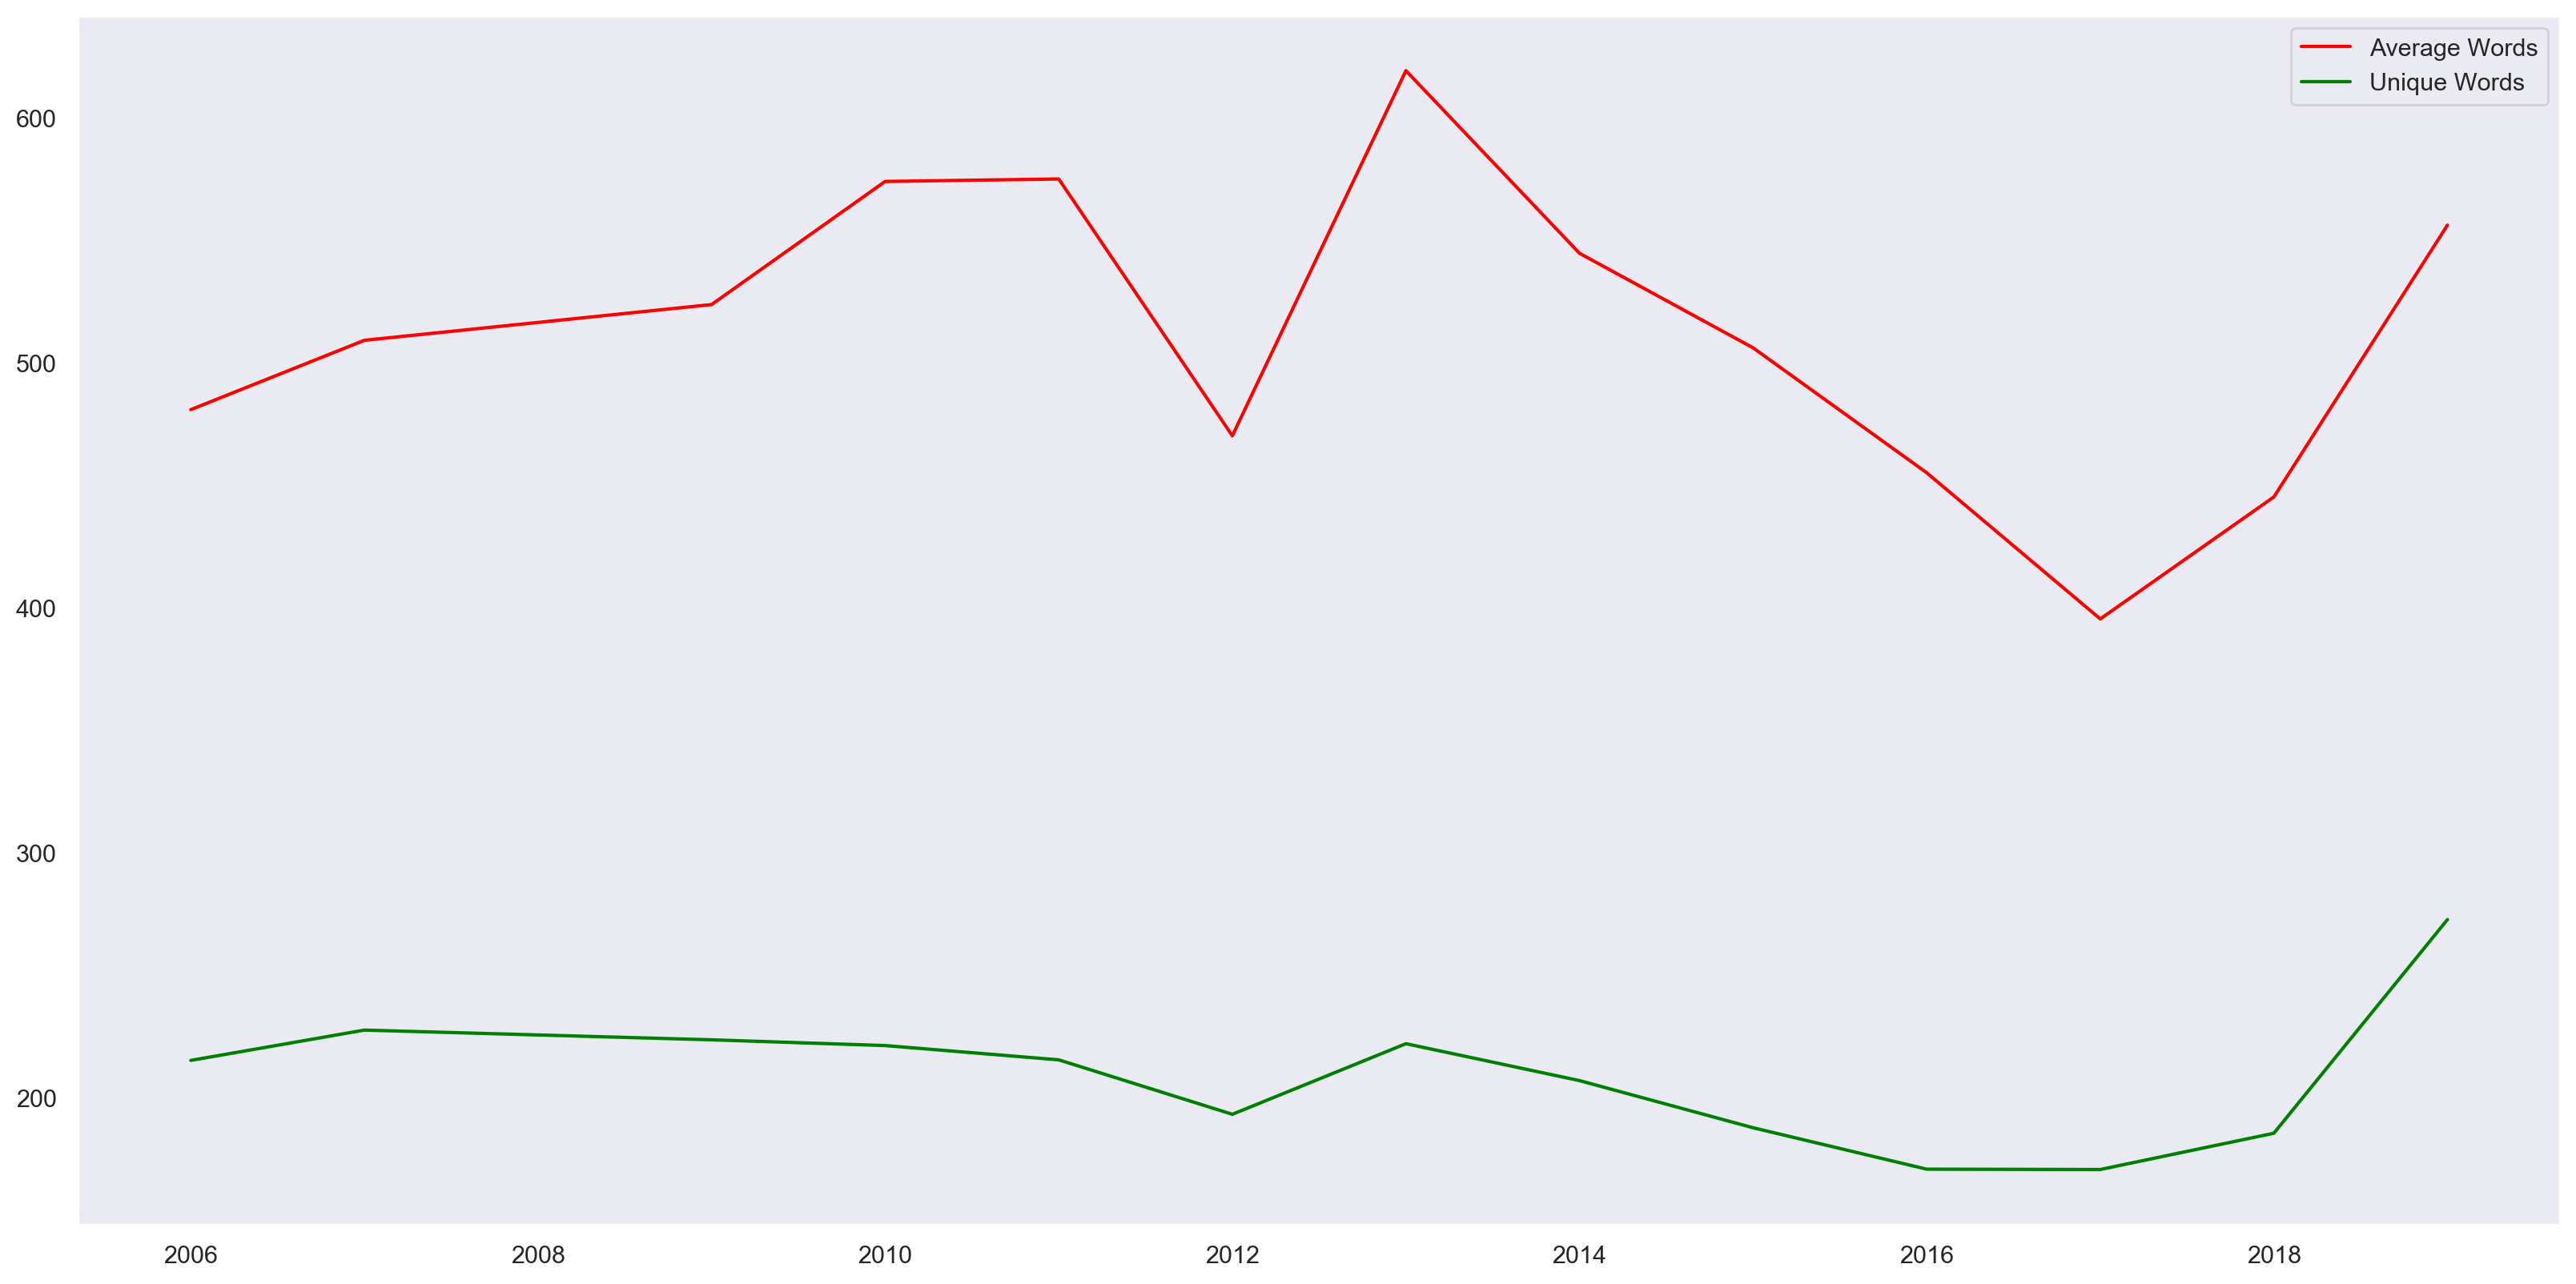

In [64]:
plt.figure(figsize=(20,10), dpi=200)
plt.plot(summary_dataset['year'], summary_dataset['Average Words'].values, color="red", label="Average Words")
plt.plot(summary_dataset['year'], summary_dataset['Unique Words'].values, color="green", label = "Unique Words")
plt.grid()
plt.legend()
plt.show()